# Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np
import pandas as pd
import os
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from PIL import Image
from keras.preprocessing.image import ImageDataGenerator
import pydot
import random
import cv2
import glob
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np
import cv2
import matplotlib.pyplot as plt
import time
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpplt
import tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout, MaxPooling2D, Activation
from tensorflow.keras.layers import Conv2D, Flatten
from tensorflow.keras.preprocessing import image
import tensorflow.keras.backend as i_d_f
import os
import pandas as pd
from tensorflow.keras.preprocessing import image
from keras import layers
import keras
import itertools
import keras
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from keras.models import Sequential 
from keras import optimizers
from keras.layers import Dropout, Flatten, Dense 
from keras import applications 
from keras.utils.np_utils import to_categorical 
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
%matplotlib inline
import math
import datetime
import time
import os,shutil
from keras import optimizers

C:\Users\Нур\AppData\Roaming\Python\Python39\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\Нур\AppData\Roaming\Python\Python39\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


TypeError: Descriptors cannot be created directly.
If this call came from a _pb2.py file, your generated code is out of date and must be regenerated with protoc >= 3.19.0.
If you cannot immediately regenerate your protos, some other possible workarounds are:
 1. Downgrade the protobuf package to 3.20.x or lower.
 2. Set PROTOCOL_BUFFERS_PYTHON_IMPLEMENTATION=python (but this will use pure-Python parsing and will be much slower).

More information: https://developers.google.com/protocol-buffers/docs/news/2022-05-06#python-updates

# Image Show

In [ ]:
df=pd.read_csv("data.csv")
del df['Unnamed: 0']

In [ ]:
df

In [22]:
from keras.preprocessing.image import ImageDataGenerator

# Определение ImageDataGenerator с включенным разделением на обучающую и валидационную выборку
datagen = ImageDataGenerator(
    rescale=1./255,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    fill_mode='nearest',
    validation_split=0.2  # Задаем размер валидационной выборки как 20% от общего количества данных
)

# Путь к папке с данными
data_dir = 'dataset'

# Создание генератора для обучающих данных
train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(227, 227),
    batch_size=32,
    class_mode='categorical',
    subset='training',  # Указываем, что это обучающая выборка
    shuffle=True
)

# Создание генератора для валидационных данных
validation_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(227, 227),
    batch_size=32,
    class_mode='categorical',
    subset='validation',  # Указываем, что это валидационная выборка
    shuffle=True
)


Found 3376 images belonging to 4 classes.
Found 841 images belonging to 4 classes.


# Image Generator

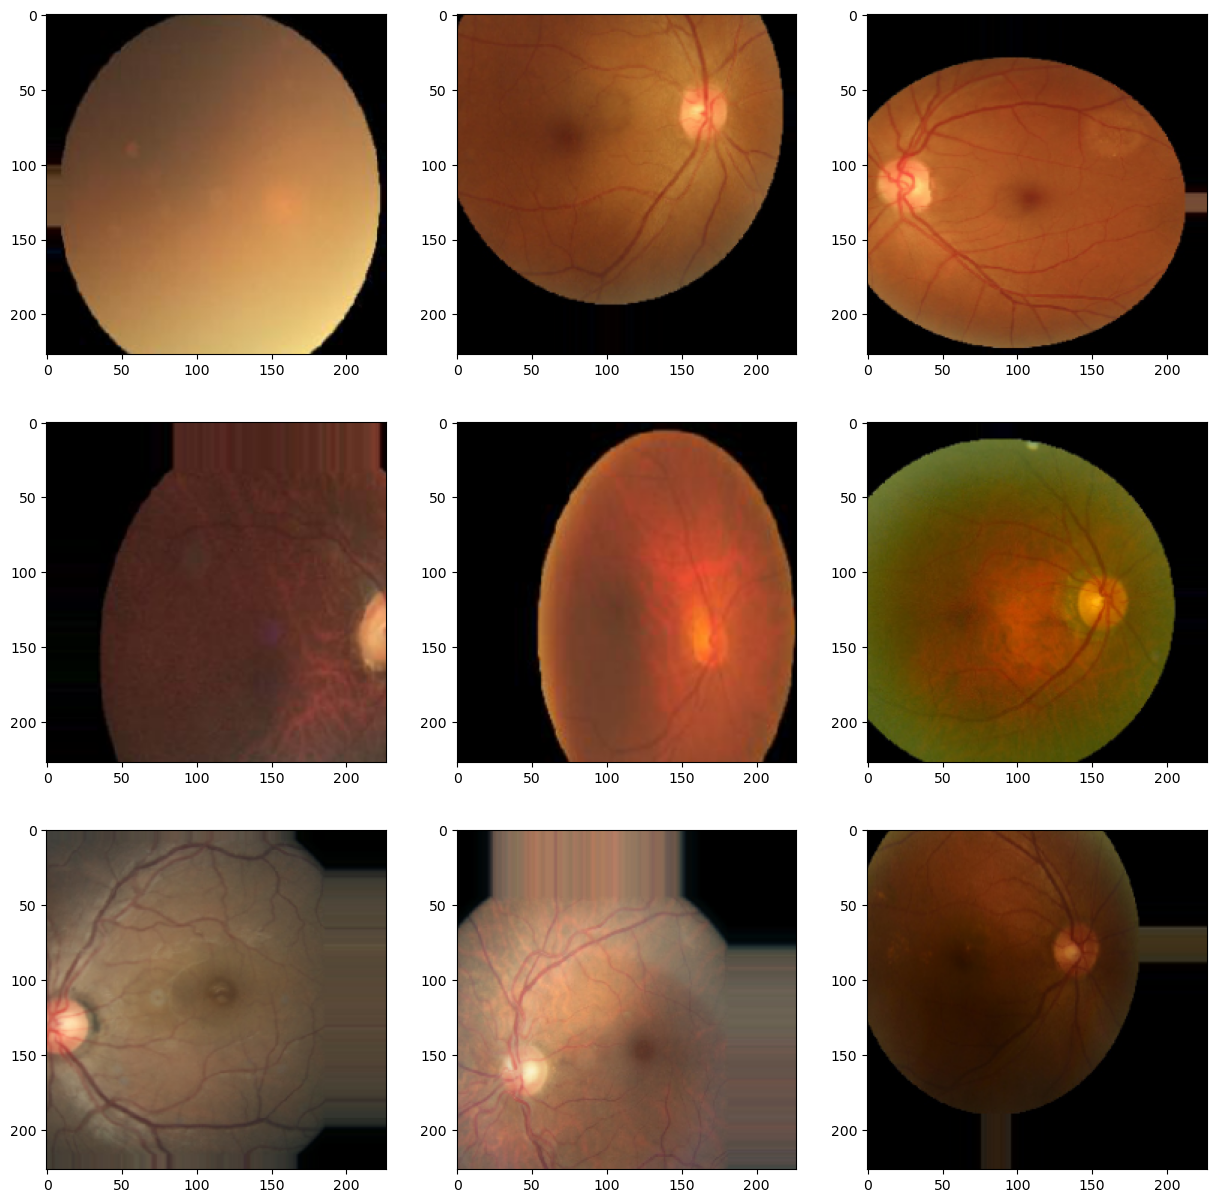

In [23]:
plt.figure(figsize=(15,15))
for i in range(9):
    #gera subfigures
    plt.subplot(330 + 1 + i)
    batch = train_generator.next()[0]*255
    image = batch[0].astype('uint8')
    plt.imshow(image)
plt.show()

# Layers

VGG16-based model is designed for image classification tasks with 4 output classes. It consists of five convolutional blocks followed by fully connected layers for feature extraction and classification. The model uses ReLU activations in convolutional and dense layers and softmax activation in the output layer for multi-class classification.

In [24]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

def alexnet_model(input_shape=(227, 227, 3), num_classes=4):
    model = Sequential()
    
    # Слой 1
    model.add(Conv2D(96, (11, 11), strides=(4, 4), activation='relu', input_shape=input_shape, padding='valid'))
    model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
    
    # Слой 2
    model.add(Conv2D(256, (5, 5), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
    
    # Слой 3
    model.add(Conv2D(384, (3, 3), activation='relu', padding='same'))
    
    # Слой 4
    model.add(Conv2D(384, (3, 3), activation='relu', padding='same'))
    
    # Слой 5
    model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
    
    # Полносвязные слои
    model.add(Flatten())
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    
    model.add(Dense(num_classes, activation='softmax'))
    
    return model


# alexnet Model

In [26]:
# Create a VGG16 model
model = alexnet_model(input_shape=(227, 227, 3), num_classes=4)
# Print model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 55, 55, 96)        34944     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 27, 27, 96)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 27, 27, 256)       614656    
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 256)      0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 13, 13, 384)       885120    
                                                                 
 conv2d_8 (Conv2D)           (None, 13, 13, 384)      

In [27]:
from keras.optimizers import SGD

In [28]:
from keras.optimizers import SGD
# Compile the model
optimizer = SGD(lr=0.001, momentum=0.9)

C:\Users\Нур\AppData\Roaming\Python\Python39\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [29]:
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [30]:
hist=model.fit(train_generator,
                steps_per_epoch=100,
                epochs=50,
                validation_data=validation_generator,
                validation_steps=100)

Epoch 1/50
100/100 [==============================] - 121s 1s/step - loss: 1.3844 - accuracy: 0.2654 - val_loss: 1.3814 - val_accuracy: 0.3092
Epoch 2/50
100/100 [==============================] - 92s 920ms/step - loss: 1.3783 - accuracy: 0.2990
Epoch 3/50
100/100 [==============================] - 94s 934ms/step - loss: 1.3643 - accuracy: 0.3401
Epoch 4/50
100/100 [==============================] - 95s 945ms/step - loss: 1.3363 - accuracy: 0.3562
Epoch 5/50
100/100 [==============================] - 95s 947ms/step - loss: 1.3162 - accuracy: 0.3781
Epoch 6/50
100/100 [==============================] - 96s 959ms/step - loss: 1.2945 - accuracy: 0.4008
Epoch 7/50
100/100 [==============================] - 95s 948ms/step - loss: 1.2607 - accuracy: 0.4209
Epoch 8/50
100/100 [==============================] - 96s 955ms/step - loss: 1.2063 - accuracy: 0.4636
Epoch 9/50
100/100 [==============================] - 96s 952ms/step - loss: 1.1676 - accuracy: 0.4724
Epoch 10/50
100/100 [============

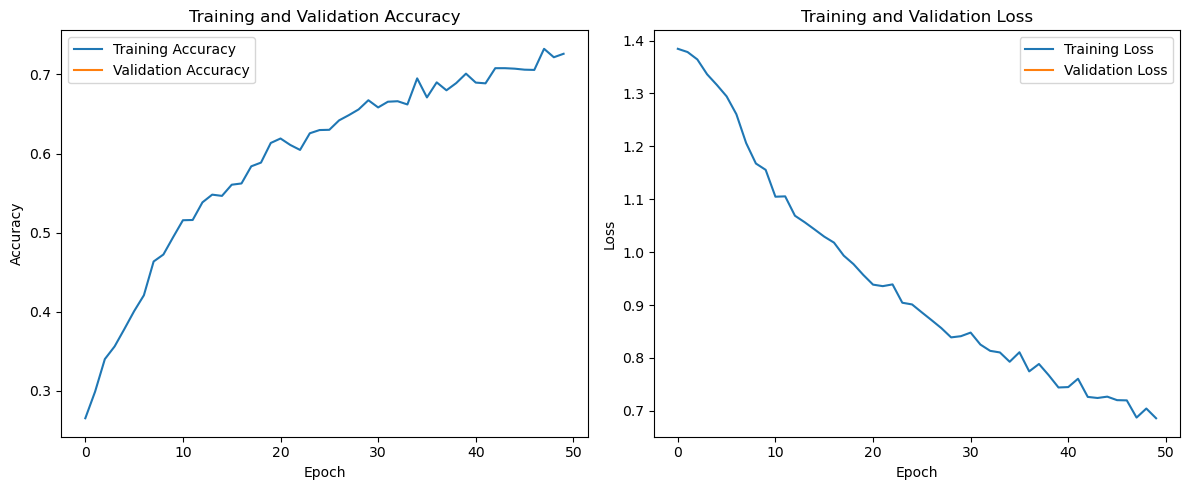

In [32]:
import matplotlib.pyplot as plt

# Проверка наличия ключей и создание графиков только если данные доступны
if 'accuracy' in hist.history and 'val_accuracy' in hist.history:
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(hist.history['accuracy'], label='Training Accuracy')
    plt.plot(hist.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

if 'loss' in hist.history and 'val_loss' in hist.history:
    plt.subplot(1, 2, 2)
    plt.plot(hist.history['loss'], label='Training Loss')
    plt.plot(hist.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

plt.tight_layout()
plt.show()
